<a href="https://colab.research.google.com/github/barauna-lo/Neurocomputing/blob/main/Project_01_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# Project 01 - Multi-layer Perceptron (MLP)

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


## PROJETO 1 – REDE MLP

1. Selecionar dois datasets (não triviais)

  * Um dataset para classificação
  * Um dataset para regressão
  * Separar em treino/validação/teste

2. Treinar modelos MLP para os dois problemas

3. Considerar:

  * Diferentes topologias (>=5 topologias, variar número de
camadas

  * Usar o algoritmo original SGD (não usar algoritmos otimizados,
e.g. ADAM)
  
  * Avaliar o impacto do uso do Momentum

  * Avaliar o impacto do uso da regularização (i.e. L2)

4. Ilustrar graficamente a evolução do treinamento (treino/validação).

5. Confeccionar um relatório (reprodutível) contendo os
experimentos e resultados

# Classification
https://www.kaggle.com/code/renangomes/simplified-solution-for-beginners-using-mpl/notebook

## Dowloading the Dataset

In [7]:
import numpy as np
np.random.seed(10)

import pandas as pd 

train = pd.DataFrame(pd.read_csv('train.csv', index_col=[0], header=0))
test  = pd.DataFrame(pd.read_csv("test.csv", index_col=[0], header=0))
display(train.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pre processing data.

On this moment we will extraxt from our dataset any information no usefulll for the traing/test problem. 

In [8]:
#Processing
train.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
display(train.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Handling missing Data

train['Age'].fillna(train['Age'].mean(), inplace=True)
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
train['SibSp'].fillna(-1, inplace=True)
train['Parch'].fillna(-1, inplace=True)

test['Age'].fillna(train['Age'].mean(), inplace=True)
test['Fare'].fillna(train['Fare'].mean(), inplace=True)
test['SibSp'].fillna(-1, inplace=True)
test['Parch'].fillna(-1, inplace=True)

In [10]:
# Encoding categorical columns
train = pd.get_dummies(train, dummy_na=True, columns=['Pclass', 'Sex', 'Embarked']).astype(float)
test = pd.get_dummies(test, dummy_na=True, columns=['Pclass', 'Sex', 'Embarked']).astype(float)

display(train.head())
display(test.head())

,Survived,Age,SibSp,Parch,Fare,Pclass_1.0,Pclass_2.0,Pclass_3.0,Pclass_nan,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
PassengerId,,,,,,,,,,,,,,,,
1,0.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,Age,SibSp,Parch,Fare,Pclass_1.0,Pclass_2.0,Pclass_3.0,Pclass_nan,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
PassengerId,,,,,,,,,,,,,,,
892,34.5,0.0,0.0,7.8292,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
893,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
894,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
895,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
896,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
#Separating attributes from output

X_train = train.drop(columns=["Survived"])[:-120]
y_train = train["Survived"][:-120]

X_val = train.drop(columns=["Survived"])[-120:]
y_val = train["Survived"][-120:]

X_test = test

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ",   X_val.shape)
print("y_val: ",   y_val.shape)
print("X_test: ",   X_test.shape)

X_train:  (771, 15)
y_train:  (771,)
X_val:  (120, 15)
y_val:  (120,)
X_test:  (418, 15)


1

In [54]:
# Model definition
# We will create a simple model using Keras. Feel free to change the number of neurons, layers, activation functions, etc.

from tensorflow.keras.optimizers import Adam

#from tensorflow.keras.optimizers import Adam # - Works
# from tensorflow.keras.optimizers import adam # - Does not work
# from keras.optimizers import Adam            # - Does not work
#from keras.optimizers import adam  

#from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                512       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [52]:
# import tensorflow as tf
# model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
# model.compile(tf.keras.optimizers.SGD(), loss='mse',metrics=['accuracy'])
# history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
#                     epochs=10, verbose=1)
# print(history.params)


# # check the keys of history object
# print(history.history.keys())


Epoch 1/10
1/1 [==============================] - 23s 23s/step - loss: 5856.3721 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 98911176.0000 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 1672027308032.0000 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 28264501170143232.0000 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 477792619520386400256.0000 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 8076765083328660532887552.0000 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 136532323063555854753725415424.0000 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 2307987865077788884810810697711616.0000 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 5

In [61]:
#accuracy
# Training

# We will train the network for 1 epochs with a batch size of 32. If you want to see statistics during training, activate the verbose parameter.

import time

epochs = 1750
start_time = time.time()

history = model.fit(X_train.values, y_train.values, epochs=epochs, batch_size=32, 
                    validation_data=(X_val.values, y_val.values), verbose=1, shuffle=True,)

print("Time spent: %d seconds" % (time.time() - start_time), "\r\nEpochs: %d" % (epochs))



Epoch 1/1750
25/25 [==============================] - 0s 4ms/step - loss: 3.3975 - accuracy: 0.5837 - val_loss: 1.6494 - val_accuracy: 0.6833
Epoch 2/1750
25/25 [==============================] - 0s 3ms/step - loss: 3.4282 - accuracy: 0.6174 - val_loss: 1.6217 - val_accuracy: 0.6833
Epoch 3/1750
25/25 [==============================] - 0s 3ms/step - loss: 3.3540 - accuracy: 0.6018 - val_loss: 1.5809 - val_accuracy: 0.6833
Epoch 4/1750
25/25 [==============================] - 0s 2ms/step - loss: 3.1763 - accuracy: 0.6329 - val_loss: 1.5375 - val_accuracy: 0.6833
Epoch 5/1750
25/25 [==============================] - 0s 2ms/step - loss: 3.5912 - accuracy: 0.6187 - val_loss: 1.4902 - val_accuracy: 0.6833
Epoch 6/1750
25/25 [==============================] - 0s 2ms/step - loss: 3.0886 - accuracy: 0.6342 - val_loss: 1.4522 - val_accuracy: 0.6833
Epoch 7/1750
25/25 [==============================] - 0s 3ms/step - loss: 3.1207 - accuracy: 0.6304 - val_loss: 1.3970 - val_accuracy: 0.6833
Epoch 

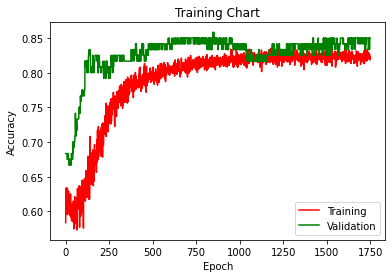

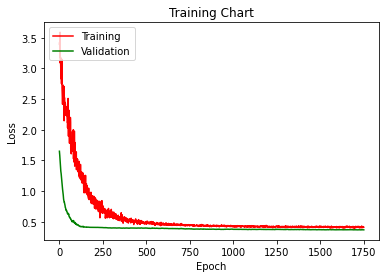

In [62]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color="r")
plt.plot(history.history['val_accuracy'], color="g")
plt.title('Training Chart')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'], color="r")
plt.plot(history.history['val_loss'], color="g")
plt.title('Training Chart')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

Accuracy (Training dataset): 0.8274967574578469 



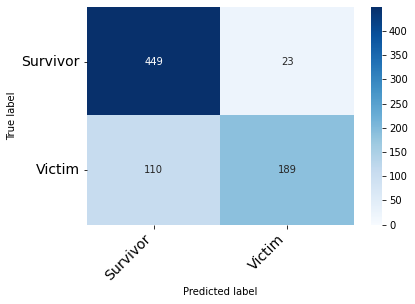

Accuracy (Validation dataset): 0.85 



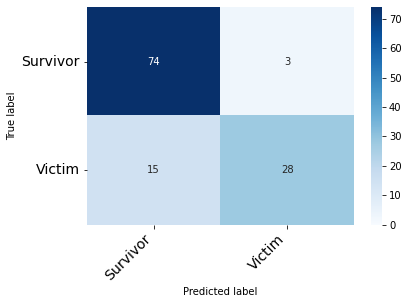

In [65]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np

print("Accuracy (Training dataset):", accuracy_score(y_train.values, np.round(model.predict(X_train.values))), "\r\n")

confusionMatrixDF = pd.DataFrame( confusion_matrix(y_train.values, np.round(model.predict(X_train.values))),
                                 index=('Survivor', 'Victim'), columns=('Survivor', 'Victim'))

heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Accuracy (Validation dataset):", accuracy_score(y_val.values, np.round(model.predict(X_val.values))), "\r\n")

confusionMatrixDF = pd.DataFrame( confusion_matrix(y_val.values, np.round(model.predict(X_val.values))),
                                 index=('Survivor', 'Victim'), columns=('Survivor', 'Victim'))

heatmap = sns.heatmap(confusionMatrixDF, annot=True, fmt="d", cmap="Blues",  vmin=0)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# References 
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History